## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

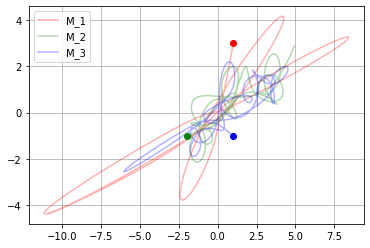

In [47]:
G = 4 * np.pi
t = 0
dt = 0.01

T = 10

m_1 = 3
m_2 = 4
m_3 = 5

m_1_pos = np.array([1, 3])
m_2_pos = np.array([-2, -1])
m_3_pos = np.array([1, -1])

m_1_p = 0
m_2_p = 0
m_3_p = 0

m_1s = []
m_2s = []
m_3s = []

while t < T:
    r_12 = m_2_pos - m_1_pos
    r_13 = m_3_pos - m_1_pos
    r_23 = m_3_pos - m_2_pos

    F_12 = -G * m_1 * m_2 * r_12 / np.linalg.norm(r_12)**2
    F_13 = -G * m_1 * m_3 * r_13 / np.linalg.norm(r_13)**2
    F_23 = -G * m_2 * m_3 * r_23 / np.linalg.norm(r_23)**2

    m_1_p = m_1_p + (-F_12 - F_13) * dt
    m_2_p = m_2_p + (F_12 - F_23) * dt
    m_3_p = m_3_p + (F_13 + F_23) * dt

    m_1_pos = m_1_pos + m_1_p * dt / m_1
    m_2_pos = m_2_pos + m_2_p * dt / m_2
    m_3_pos = m_3_pos + m_3_p * dt / m_3

    m_1s.append(m_1_pos)
    m_2s.append(m_2_pos)
    m_3s.append(m_3_pos)

    t += dt

m_1s = np.array(m_1s)
m_2s = np.array(m_2s)
m_3s = np.array(m_3s)

m_1_x = m_1s[:, 0]
m_1_y = m_1s[:, 1]
m_2_x = m_2s[:, 0]
m_2_y = m_2s[:, 1]
m_3_x = m_3s[:, 0]
m_3_y = m_3s[:, 1]

plt.plot(m_1_x, m_1_y, 'r', label='M_1', alpha=0.3)
plt.plot(m_2_x, m_2_y, 'g', label='M_2', alpha=0.3)
plt.plot(m_3_x, m_3_y, 'b', label='M_3', alpha=0.3)
plt.plot(m_1_x[0], m_1_y[0], 'ro')
plt.plot(m_2_x[0], m_2_y[0], 'go')
plt.plot(m_3_x[0], m_3_y[0], 'bo')
plt.legend()
plt.grid()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [wolfram](http://scienceworld.wolfram.com/physics/DoublePendulum.html):

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

In [ ]:
x = 1.
d_x = 0.
theta = 0.3
d_theta = 0.
theta_0 = [x, d_x, theta, d_theta]

x_0 = 1
k = 3.5
m = 0.2
g = 9.8

t = np.arange(0, 25, 0.01)


def func(y, t):  # define vector f(y,t)
    x, d_x, theta, d_theta = y
    dd_x = (x_0 + x) * d_theta**2 - (k * x / m) + g * np.cos(theta)
    dd_theta = -1 * (g * np.sin(theta) + 2 * d_x * d_theta) / (x_0 + x)
    return [d_x, dd_x, d_theta, dd_theta]


vec = odeint(func, theta_0, t)
x = vec[:, 0]
d_x = vec[:, 1]
theta = vec[:, 2]
d_theta = vec[:, 3]

fig, axes = plt.subplots(7, 1, figsize=(8, 24))
fig.suptitle('Springy Pendulum:')

axes[0].plot(t, x)
axes[0].set_title("x-t")
axes[0].grid()

axes[1].plot(t, d_x)
axes[1].set_title("d_x-t")
axes[1].grid()

axes[2].plot(t, theta)
axes[2].set_title("theta-t")
axes[2].grid()

axes[3].plot(t, d_theta)
axes[3].set_title("d_theta-t")
axes[3].grid()

axes[4].plot(x, theta)
axes[4].set_title("Pendulum Motion x-theta")
axes[4].grid()

axes[5].plot(x, d_theta)
axes[5].set_title("Pendulum Motion x-d_theta")
axes[5].grid()

pos_x = (x_0 + x) * np.sin(theta)
pos_y = (x_0 + x) * np.cos(theta)
axes[6].plot(pos_x, pos_y)
axes[6].set_title("Pendulum Motion")
axes[6].grid()
plt.show()